### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [ ]:
data.duplicated().sum()

In [5]:
# drop duplicates
data = data.drop_duplicates()

In [6]:
X = data.drop(columns='Type')
y = data.loc[:,'Type']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [8]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred, average='weighted')

0.6684921230307577

In [14]:
scores = []
f1 = []
for i in range(1,16):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)

  y_pred = knn.predict(X_test_scaled)
  scores.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='weighted'))

In [12]:
# heuristic approach of finding the best value of k
np.sqrt(X.shape[0])

14.594519519326424

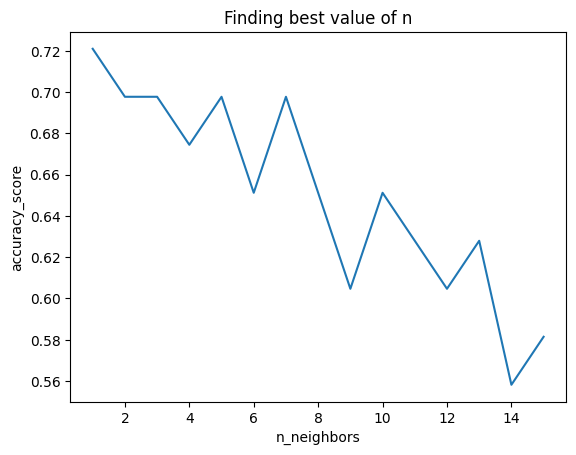

In [15]:
plt.plot(range(1,16), scores)
plt.title('Finding best value of n')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy_score')
plt.show()

In [ ]:
scores = np.array(scores)
np.argmax(scores)

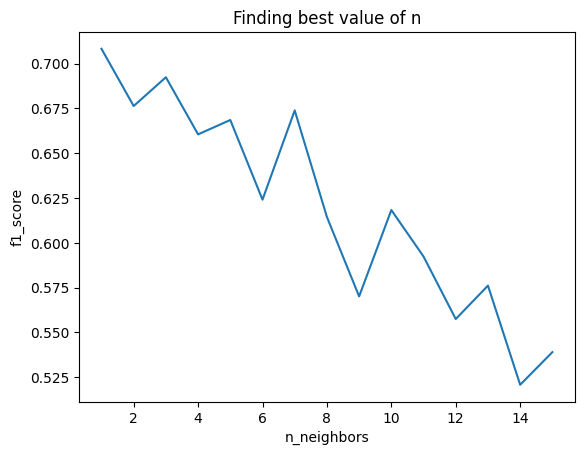

In [16]:
plt.plot(range(1,16), f1)
plt.title('Finding best value of n')
plt.xlabel('n_neighbors')
plt.ylabel('f1_score')
plt.show()

- As per the graph of n_neighbors vs. accuracy scores, best value of n= 5
- As per the graph of n_neighbors vs. F1 scores, best value of n= 3
- I'll keep it 5 because if k is very small, the model may underfit